# Machine Learning project a.y. 2021/2022

## Scikit-learn MLP model

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

## Loading training set and blind test set

In [2]:
df_visual = pd.read_csv('./data/ML-CUP21-TR.csv', usecols=[11,12], names=['idx','f1','f2','f3','f4','f5','f6','f7','f8','f9','f10', 'x','y'])
df_task_tr = pd.read_csv('./data/ML-CUP21-TR.csv', names=['idx','f1','f2','f3','f4','f5','f6','f7','f8','f9','f10', 'x','y'])
df_task_tr = df_task_tr[7:] # remove first 7 rows of comments
df_visual = df_visual[7:]

df_blind_ts = pd.read_csv('./data/ML-CUP21-TS.csv', names=['idx','f1','f2','f3','f4','f5','f6','f7','f8','f9','f10'])
df_blind_ts = df_blind_ts[7:]

## MONK Dataset
### MONK1

In [3]:
def load_monk(path_train, path_test):
    df_monk_train = pd.read_csv(path_train, sep=" ", skipinitialspace=True, names=['class','a1','a2','a3','a4','a5','a6','id'])
    df_monk_train.drop(labels='id', axis=1, inplace=True)

    df_monk_test = pd.read_csv(path_test, sep=" ", skipinitialspace=True,  names=['class','a1','a2','a3','a4','a5','a6','id'])
    df_monk_test.drop(labels='id', axis=1, inplace=True)

    return df_monk_train, df_monk_test

In [4]:
df_monk1_train, df_monk1_test = load_monk('./data/MONK/monks-1.train', './data/MONK/monks-1.test')

In [5]:
df_monk1_train.head() #first column is the target (can be either 0 or 1)

,class,a1,a2,a3,a4,a5,a6
0,1,1,1,1,1,3,1
1,1,1,1,1,1,3,2
2,1,1,1,1,3,2,1
3,1,1,1,1,3,3,2
4,1,1,1,2,1,2,1


In [6]:
def split_train_test(df_monk_train, df_monk_test):
    target_train = df_monk_train[['class']]
    df_monk_train.drop(labels='class', axis=1, inplace=True)
    target_test = df_monk_test[['class']]
    df_monk_test.drop(labels='class', axis=1, inplace=True)
    X_train = df_monk_train.values #returns a ndarray
    y_train = target_train.values.ravel() #flattens the array into a 1-dimensional array
    X_test = df_monk_test.values
    y_test = target_test.values.ravel()

    return X_train, y_train, X_test, y_test

In [7]:
X_train_M1, y_train_M1, X_test_M1, y_test_M1 = split_train_test(df_monk1_train, df_monk1_test)

### One hot encoding 
In the MONK dataset we have the categories encoded using label encoding, we need to use one hot encoding in order to have better results. 

In [8]:
enc_train = OneHotEncoder()
enc_train.fit(X_train_M1)
X_train_M1 = enc_train.transform(X_train_M1).toarray()
print(X_train_M1.shape)

enc_test = OneHotEncoder()
enc_test.fit(X_test_M1)
X_test_M1 = enc_test.transform(X_test_M1).toarray()
print(X_test_M1.shape)

(124, 17)
(432, 17)


In [9]:
classifier_M1 = MLPClassifier(random_state=69, batch_size=1).fit(X_train_M1, y_train_M1)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.019593770503771743


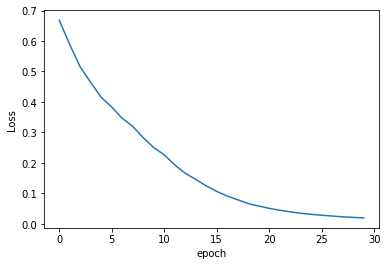

In [10]:
plt.plot(classifier_M1.loss_curve_)
plt.ylabel('Loss')
plt.xlabel('epoch');
print(classifier_M1.best_loss_)

In [11]:
y_predicted_M1 = classifier_M1.predict(X_test_M1)
print(f"Accuracy on MONK1: {classifier_M1.score(X_test_M1, y_test_M1)}")
print(f"MEE on MONK1: {(np.linalg.norm(y_predicted_M1-y_test_M1))}") # MEE distance (a.k.a. norm 2)

Accuracy on MONK1: 1.0
MEE on MONK1: 0.0


### MONK2

In [12]:
df_monk2_train, df_monk2_test = load_monk('./data/MONK/monks-2.train', './data/MONK/monks-2.test')

In [13]:
df_monk2_train.head() #first column is the target (can be either 0 or 1)

,class,a1,a2,a3,a4,a5,a6
0,0,1,1,1,1,2,2
1,0,1,1,1,1,4,1
2,0,1,1,1,2,1,1
3,0,1,1,1,2,1,2
4,0,1,1,1,2,2,1


In [14]:
X_train_M2, y_train_M2, X_test_M2, y_test_M2 = split_train_test(df_monk2_train, df_monk2_test)

In [15]:
enc_train = OneHotEncoder()
enc_train.fit(X_train_M2)
X_train_M2 = enc_train.transform(X_train_M2).toarray()
print(X_train_M2.shape)

enc_test = OneHotEncoder()
enc_test.fit(X_test_M2)
X_test_M2 = enc_test.transform(X_test_M2).toarray()
print(X_test_M2.shape)

(169, 17)
(432, 17)


In [16]:
classifier_M2 = MLPClassifier(random_state=69, batch_size=1).fit(X_train_M2, y_train_M2)

0.007489527596447781


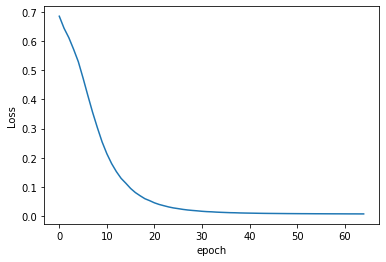

In [17]:
plt.plot(classifier_M2.loss_curve_)
plt.ylabel('Loss')
plt.xlabel('epoch');
print(classifier_M2.best_loss_)

In [18]:
y_predicted_M2 = classifier_M2.predict(X_test_M2)
print(f"Accuracy on MONK2: {classifier_M2.score(X_test_M2, y_test_M2)}")
print(f"MEE on MONK2: {(np.linalg.norm(y_predicted_M2-y_test_M2))}") # MEE distance (a.k.a. norm 2)

Accuracy on MONK2: 1.0
MEE on MONK2: 0.0


### MONK3

In [19]:
df_monk3_train, df_monk3_test = load_monk('./data/MONK/monks-3.train', './data/MONK/monks-3.test')

In [20]:
df_monk3_train.head() #first column is the target (can be either 0 or 1)

,class,a1,a2,a3,a4,a5,a6
0,1,1,1,1,1,1,2
1,1,1,1,1,1,2,1
2,1,1,1,1,1,2,2
3,0,1,1,1,1,3,1
4,0,1,1,1,1,4,1


In [21]:
X_train_M3, y_train_M3, X_test_M3, y_test_M3 = split_train_test(df_monk3_train, df_monk3_test)

In [22]:
enc_train = OneHotEncoder()
enc_train.fit(X_train_M3)
X_train_M3 = enc_train.transform(X_train_M3).toarray()
print(X_train_M3.shape)

enc_test = OneHotEncoder()
enc_test.fit(X_test_M3)
X_test_M3 = enc_test.transform(X_test_M3).toarray()
print(X_test_M3.shape)

(122, 17)
(432, 17)


In [23]:
classifier_M3 = MLPClassifier(random_state=69, batch_size=1).fit(X_train_M3, y_train_M3)

0.008842388763526306


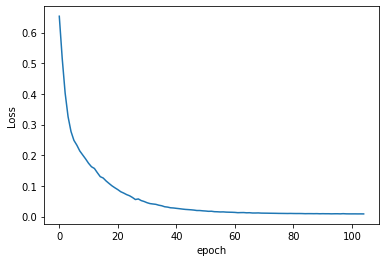

In [24]:
plt.plot(classifier_M3.loss_curve_)
plt.ylabel('Loss')
plt.xlabel('epoch');
print(classifier_M3.best_loss_)

In [25]:
from sklearn.metrics import accuracy_score

y_predicted_M3 = classifier_M3.predict(X_test_M3)
print(f"Accuracy on MONK3: {classifier_M3.score(X_test_M3, y_test_M3)}")
print(f"MEE on MONK3: {(np.linalg.norm(y_predicted_M3-y_test_M3))}") # MEE distance (a.k.a. norm 2)

Accuracy on MONK3: 0.9467592592592593
MEE on MONK3: 4.795831523312719


## Regression task

In [26]:
df_task_tr.drop(labels="idx", axis=1, inplace=True)

In [27]:
y = df_task_tr[['x','y']]
X = df_task_tr.drop(labels=['x','y'], axis=1)

In [28]:
print(X.shape)
print(y.shape)

(1477, 10)
(1477, 2)


## Internal Test set
We split the training set obtaining an internal test set composed of the 10% of the training set, we will use this internal test set to test the generalization error

In [29]:
X, X_internal_test, y, y_internal_test = train_test_split(X, y, test_size=0.1, random_state=69)
print(f"X shape: {X.shape}")
print(f"X internal test shape: {X_internal_test.shape}")
print(f"y shape: {y.shape}")
print(f"y internal test shape: {y_internal_test.shape}")

X shape: (1329, 10)
X internal test shape: (148, 10)
y shape: (1329, 2)
y internal test shape: (148, 2)


### Training set and validation set
The validation set is composed by the 33% of the dataset the remaining samples will be used to train our model

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (890, 10)
X_test shape: (439, 10)
y_train shape: (890, 2)
y_test shape: (439, 2)


### K-fold cross validation

In [31]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
for k, (train,test) in enumerate(kfold):
    print(train)

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous-multioutput' instead.

In [32]:
#in order to find the best set of parameter setting, we can run a grid search
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

#define the parameters' values you want to try
params = {"hidden_layer_sizes": [(3,), (5,), (10,), (50,), (100,), (250,),],
              "activation": ['identity', 'logistic', 'tanh', 'relu'],
              "solver": ['sgd'],
              "learning_rate": ['constant', 'adaptive'],
              "learning_rate_init": [0.01, 0.05, 0.1, 0.25, 0.5],
              "alpha": [0.0001, 0.0005, 0.001, 0.005, 0.01],
              "batch_size": [1, 5, 25, 50, 100, 240, 500, X_train.shape[0]],
              "n_iter_no_change": [10, 25, 50],
             }
#define the model
regressor = MLPRegressor()
#define the grid search
grid_search = GridSearchCV(estimator=regressor, param_grid=params,
                            n_jobs=-1, 
                            scoring=make_scorer(accuracy_score))
#run the grid search
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print('Best setting parameters ', grid_search.cv_results_['params'][0])

Best setting parameters  {'mean_fit_time': array([ 2.97016897,  3.50662994,  8.85200586,  0.42723308, 10.75271716,
        0.12690668,  4.65998788,  0.28764653,  0.05240173,  0.97636027]), 'std_fit_time': array([0.41932209, 0.79849295, 1.03956158, 0.29348571, 0.42003835,
       0.03461887, 0.80820413, 0.20988051, 0.02042269, 0.19144875]), 'mean_score_time': array([0.00367532, 0.00399513, 0.00743618, 0.00337362, 0.00425253,
       0.00678244, 0.00368581, 0.00246577, 0.00215983, 0.00284896]), 'std_score_time': array([1.04178053e-03, 1.29015200e-04, 9.23740931e-03, 1.10298165e-03,
       7.27332530e-04, 9.28359751e-03, 1.00568236e-03, 5.91450489e-04,
       3.74871045e-05, 6.11502758e-04]), 'param_activation': masked_array(data=['tanh', 'tanh', 'logistic', 'logistic', 'tanh', 'relu',
                   'relu', 'relu', 'identity', 'logistic'],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtyp

In [ ]:
model = MLPRegressor(random_state=42, activation = 'tanh', alpha = 0.008866548404600796, batch_size = 1, hidden_layer_sizes = (3,), learning_rate = 'constant', learning_rate_init = 0.14645860516234416,  solver='sgd', n_iter_no_change=10, max_iter=1000).fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

-0.652321597673486

In [ ]:
model.score(X_internal_test, y_internal_test)

-0.4800924591777739

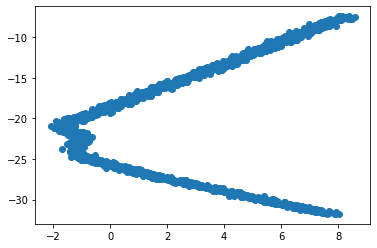

In [ ]:
plt.scatter(df_visual['x'], df_visual['y'])

In [ ]:
label = df[['x','y']]
df.drop(labels=['x','y'], axis=1, inplace=True)
#train_set, test_set, train_label, test_label = train_test_split(adult, label, stratify =label, test_size=0.30)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, label, random_state=42, test_size=0.30)

In [ ]:
regressor = MLPRegressor(random_state=42, max_iter=500).fit(X_train, y_train)

In [ ]:
regressor.score(X_test, y_test)

0.8696963705237135

In [ ]:
y_pred = regressor.predict(df_blind_ts)

In [ ]:
y_pred = pd.DataFrame(data=y_pred, columns=["x", "y"])

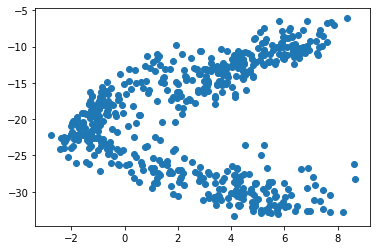

In [ ]:
plt.scatter(y_pred['x'], y_pred['y'])

## Grid Search

In [ ]:
#to find the best set of parameter setting, we can run a grid search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

#define the parameters' values you want to try
param_dist = {"hidden_layer_sizes": [(100,), (50,), (100, 100), (50,50)],
              "activation": ['identity', 'logistic', 'tanh', 'relu'],
              "solver": ['lbfgs', 'sgd', 'adam'],
              "max_iter": [1000],
             }
#define the number of iterations
n_iter_search = 5
#define the model
regressor = MLPRegressor()
#define the grid search
grid_search = RandomizedSearchCV(regressor, param_distributions=param_dist, 
                            n_iter=n_iter_search, 
                            n_jobs=10, 
                            scoring=make_scorer(accuracy_score))
#run the grid search
grid_search.fit(X_train, y_train)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  category=UserWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RandomizedSearchCV(estimator=MLPRegressor(), n_iter=5, n_jobs=10,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,), (50,),
                                                               (100, 100),
                                                               (50, 50)],
                                        'max_iter': [1000],
                                        'solver': ['lbfgs', 'sgd', 'adam']},
                   scoring=make_scorer(accuracy_score))

In [ ]:
print('Best setting parameters ', grid_search.cv_results_['params'][0])

Best setting parameters  {'solver': 'lbfgs', 'max_iter': 1000, 'hidden_layer_sizes': (50, 50), 'activation': 'tanh'}


In [ ]:
gs_regressor = MLPRegressor(solver='adam', max_iter = 1000, hidden_layer_sizes = (100, 100), activation = 'tanh').fit(X_train, y_train)

In [ ]:
gs_regressor.score(X_test, y_test)

0.908432158442845

In [ ]:
y_pred = gs_regressor.predict(df_blind_ts)

In [ ]:
y_pred = pd.DataFrame(data=y_pred, columns=["x", "y"])

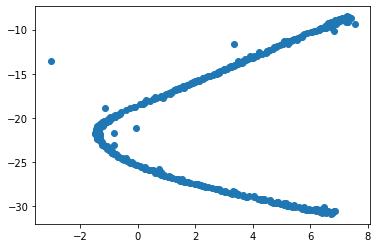

In [ ]:
plt.scatter(y_pred['x'], y_pred['y'])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d9d840c9-75b3-4185-bb01-105f5cca8d83' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>